In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Flatten,BatchNormalization,Dropout
from keras.models import Sequential

In [33]:
path_dir = 'C:/Users/aryan/Desktop/WORK/MELE/1/Dataset/Faces'

In [34]:
base_dir = 'celebrity_faces'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(val_dir)

In [36]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 1180 images belonging to 31 classes.
Found 303 images belonging to 31 classes.


In [37]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [38]:
for layer in base_model.layers:
    layer.trainable=False

In [41]:
model=Sequential()

model.add(base_model)
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization(momentum=0.99,epsilon=0.001))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization(momentum=0.99,epsilon=0.001))
model.add(Dropout(0.2))


model.add(Dense(31,activation='softmax'))

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [43]:
history=model.fit(train_ds,validation_data=valid_ds,epochs=25)

Epoch 1/25
38/38 [==============================] - 33s 801ms/step - loss: 3.1724 - accuracy: 0.1628 - val_loss: 3.8441 - val_accuracy: 0.1941
Epoch 2/25
38/38 [==============================] - 29s 767ms/step - loss: 2.2367 - accuracy: 0.3686 - val_loss: 2.3820 - val_accuracy: 0.3040
Epoch 3/25
38/38 [==============================] - 30s 786ms/step - loss: 1.7676 - accuracy: 0.5058 - val_loss: 1.8691 - val_accuracy: 0.4872
Epoch 4/25
38/38 [==============================] - 30s 782ms/step - loss: 1.4493 - accuracy: 0.6198 - val_loss: 1.8458 - val_accuracy: 0.4689
Epoch 5/25
38/38 [==============================] - 30s 778ms/step - loss: 1.2091 - accuracy: 0.6793 - val_loss: 1.4120 - val_accuracy: 0.6190
Epoch 6/25
38/38 [==============================] - 29s 764ms/step - loss: 0.9850 - accuracy: 0.7678 - val_loss: 1.3206 - val_accuracy: 0.6264
Epoch 7/25
38/38 [==============================] - 29s 763ms/step - loss: 0.8722 - accuracy: 0.7760 - val_loss: 1.1854 - val_accuracy: 0.6630

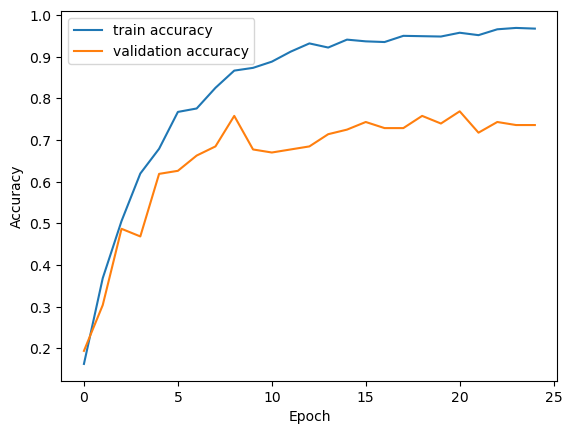

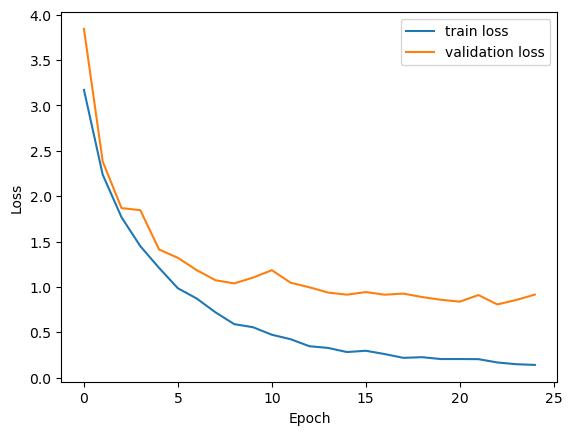

In [44]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()